## Tables of contents
+ [0. Import libraries](#0.-Import-libraries)
+ [1. Read dataframe and Delete ID](#1.-Read-dataframe-and-Delete-ID)
+ [2. Statistical overview](#2.-Statistical-overview)
+ [3. Eliminate outliers](#3.-Eliminate-outliers)
+ [4. Compare the 0=outcome category with the 1=outcome category](#4.-Compare-the-0=outcome-category-with-the-1=outcome-category)
+ [5. Balance the data by the outcome category variable](#5.-Balance-the-data-by-the-outcome-category-variable)
+ [6. Numericalize non-numeric variables](#6.-Numericalize-non-numeric-variables)
+ [7. Train and Test](#7.-Train-and-Test)
+ [8. Decision Tree and SVM methods](#8.-Decision-tree-and-SVM-methods)
+ [9. Importance of variables in the decision tree](#9.-Importance-of-variables-in-the-decision-tree)
+ [10. Optimize SVM and Evaluation](#10.-Optimize-SVM-and-Evaluation)


## 0. Import libraris and setups

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-insurance-clain/Car_Insurance_Claim 1.csv


In [57]:
import os # help to find dataset path
os.listdir("/kaggle/input")

['car-insurance-clain']

In [58]:
# call useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read dataframe and Delete ID 
1. Read data in dataframe and, &#9989;
2. delete redundant variable ID. &#9989;

In [59]:
# read csv file and define it as 'df'
# if you use kaggle with this code run below code
df = pd.read_csv("/kaggle/input/car-insurance-clain/Car_Insurance_Claim 1.csv")

# otherwise you can run this code
#df = pd.read_csv("Car_Insurance_Claim 1.csv")
df.head() # show first 5 row of dataset

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [60]:
cdf = df.drop(columns=["ID"]) #remove ID and name new dataset 'cdf'
features = cdf.columns # put columns name in features
features

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [61]:
# what is shape of dataset?
cdf.shape

(10000, 18)

Our dataset *Car_Insurance_Claim 1.csv* has 18 columns and 10K rows

## 2. Statistical overview

1. Obtain a summary of the data, &#9989;
2. indicating the overall statistics and &#9989;
3. the number of missing values for each variable. &#9989;
4. Which variables are non-numeric? &#9989;
5. Is the outcome variable balanced?  &#9989;

In [62]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [63]:
cdf.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


***Non-numerical values :***
1. **AGE**
    + +65
    + 40-64
    + 26-39
    + 16-25
2. **GENDER**
    + Male
    + Female
3. **RACE**
   + majority
   + minority
4. **DRIVING_EXPERIENCE**
   + 0-9y
   + 10-19y
   + 20-29y
   + 30y+
5. **EDUCATION**
   + none
   + high school
   + university
6. **INCOME**
   + upper class
   + poverty
   + working class
   + middle class
7. **VEHICLE_YEAR**
   + after 2015
   + before 2015
8. **VEHICLE_TYPE**
   + sedan
   + sports car

***The number of missing values for each variable :***


In [64]:
print(cdf.isnull().sum())

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [65]:
#data type of each column
cdf.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

***You can see the unique values of each columns and the number of missing values :***

In [66]:
for column in features:
    print(f"""
    {column}({type(column)}) : Number of unique values is {len(cdf[column].unique())}:
    {cdf[column].unique()}
    and the number of missing values is : {cdf[column].isnull().sum()}
    """)
    print("-------")


    AGE(<class 'str'>) : Number of unique values is 4:
    ['65+' '16-25' '26-39' '40-64']
    and the number of missing values is : 0
    
-------

    GENDER(<class 'str'>) : Number of unique values is 2:
    ['female' 'male']
    and the number of missing values is : 0
    
-------

    RACE(<class 'str'>) : Number of unique values is 2:
    ['majority' 'minority']
    and the number of missing values is : 0
    
-------

    DRIVING_EXPERIENCE(<class 'str'>) : Number of unique values is 4:
    ['0-9y' '10-19y' '20-29y' '30y+']
    and the number of missing values is : 0
    
-------

    EDUCATION(<class 'str'>) : Number of unique values is 3:
    ['high school' 'none' 'university']
    and the number of missing values is : 0
    
-------

    INCOME(<class 'str'>) : Number of unique values is 4:
    ['upper class' 'poverty' 'working class' 'middle class']
    and the number of missing values is : 0
    
-------

    CREDIT_SCORE(<class 'str'>) : Number of unique values is 9019:
 

**Is the outcome variable balanced?**

OUTCOME
0    68.67
1    31.33
Name: proportion, dtype: float64


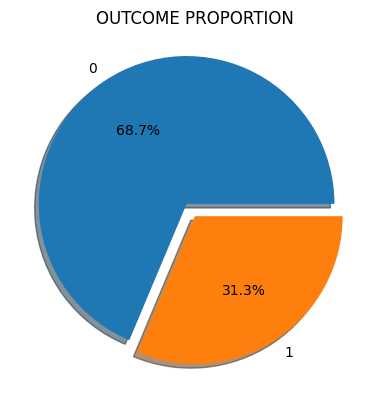

In [67]:
#count values of each class (0: didn't claim, 1: did claim) in OUTCOME column
#for calculate the percentage of each class we can normalize them then multiply to 100
per_outcome = cdf["OUTCOME"].value_counts(normalize=True)*100

print(per_outcome)

#for visualization we can use pie chart
explode = (0.1, 0) #gap between two class
fig, ax = plt.subplots()
per_outcome.plot(kind='pie', autopct='%1.1f%%',
                explode=explode, shadow=True)
ax.set_title('OUTCOME PROPORTION')
ax.set_ylabel('')

plt.show()

**OUTCOME is moderately imbalanced.**

## 3. Eliminate outliers

1. Eliminate outliers using a boxplot. &#9989;

In [68]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

**REMOVE OUTLIERS :**
1. FIND ${Q_1}$ AND ${Q_3}$
   + ${Q_1}$ : is the 25th percentile (value below which 25% of data falls).
   + ${Q_3}$ : is the 75th percentile (value below which 75% of data falls).
2. CALCULATE $IQR$
   + $IQR$ = ${Q_3}$ - ${Q_1}$
3. CALCULATE $LOWER BOUND$ AND $UPPER BOUND$:
   + $LOWER BOUND$ = ${Q_1} - 1.5 * IQR$
   + $UPPER BOUND$ = ${Q_3} + 1.5 * IQR$
4. REMOVE ANY DATA OUT OF THESE TWO BOUNDS.

In [69]:
def remove_outlier(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(.25)
        Q3 = df_clean[col].quantile(.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR

        df_clean = df_clean[
                (df_clean[col] <= upper_bound) & (df_clean[col] >= lower_bound)
        ]
    return df_clean

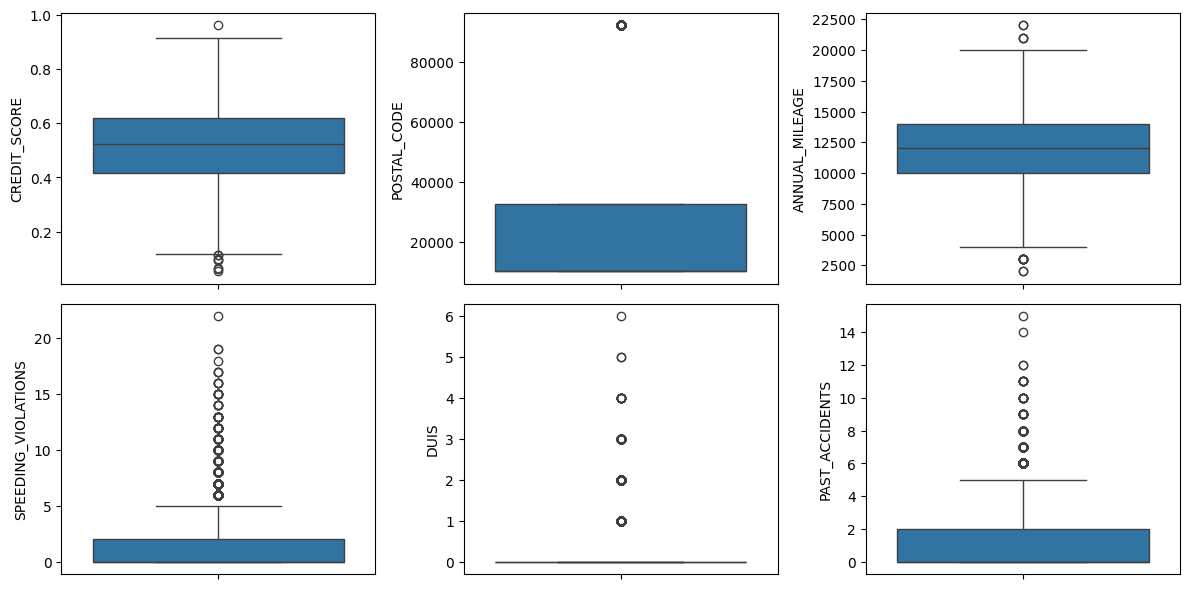

In [70]:
# numerical features

fig, axes = plt.subplots(2, 3, figsize=(12,6))

sns.boxplot(cdf["CREDIT_SCORE"], ax=axes[0, 0])

sns.boxplot(cdf["POSTAL_CODE"], ax=axes[0, 1])

sns.boxplot(cdf["ANNUAL_MILEAGE"], ax=axes[0, 2])

sns.boxplot(cdf["SPEEDING_VIOLATIONS"], ax=axes[1, 0])

sns.boxplot(cdf["DUIS"], ax=axes[1, 1])

sns.boxplot(cdf["PAST_ACCIDENTS"], ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [71]:
numerical_features = ["CREDIT_SCORE", "VEHICLE_OWNERSHIP", "MARRIED"
                    , "CHILDREN", "POSTAL_CODE", "ANNUAL_MILEAGE"
                    , "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]

cdf_no_outlier = remove_outlier(cdf, numerical_features)

In [72]:
cdf_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5371 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  5371 non-null   object 
 1   GENDER               5371 non-null   object 
 2   RACE                 5371 non-null   object 
 3   DRIVING_EXPERIENCE   5371 non-null   object 
 4   EDUCATION            5371 non-null   object 
 5   INCOME               5371 non-null   object 
 6   CREDIT_SCORE         5371 non-null   float64
 7   VEHICLE_OWNERSHIP    5371 non-null   int64  
 8   VEHICLE_YEAR         5371 non-null   object 
 9   MARRIED              5371 non-null   int64  
 10  CHILDREN             5371 non-null   int64  
 11  POSTAL_CODE          5371 non-null   int64  
 12  ANNUAL_MILEAGE       5371 non-null   float64
 13  VEHICLE_TYPE         5371 non-null   object 
 14  SPEEDING_VIOLATIONS  5371 non-null   int64  
 15  DUIS                 5371 non-null   int64 

As you can see, automatically we handle the mising values problem.

In [73]:
for col in features:
    print(f"Missing values of \"{col}\" after removing outliers: {cdf_no_outlier[col].isnull().sum()}")

Missing values of "AGE" after removing outliers: 0
Missing values of "GENDER" after removing outliers: 0
Missing values of "RACE" after removing outliers: 0
Missing values of "DRIVING_EXPERIENCE" after removing outliers: 0
Missing values of "EDUCATION" after removing outliers: 0
Missing values of "INCOME" after removing outliers: 0
Missing values of "CREDIT_SCORE" after removing outliers: 0
Missing values of "VEHICLE_OWNERSHIP" after removing outliers: 0
Missing values of "VEHICLE_YEAR" after removing outliers: 0
Missing values of "MARRIED" after removing outliers: 0
Missing values of "CHILDREN" after removing outliers: 0
Missing values of "POSTAL_CODE" after removing outliers: 0
Missing values of "ANNUAL_MILEAGE" after removing outliers: 0
Missing values of "VEHICLE_TYPE" after removing outliers: 0
Missing values of "SPEEDING_VIOLATIONS" after removing outliers: 0
Missing values of "DUIS" after removing outliers: 0
Missing values of "PAST_ACCIDENTS" after removing outliers: 0
Missing 

## 4. Compare the 0=outcome category with the 1=outcome category

Compare the 0=outcome category with the 1=outcome category (draw a box plot of the variables in each category separately. What are the differences?


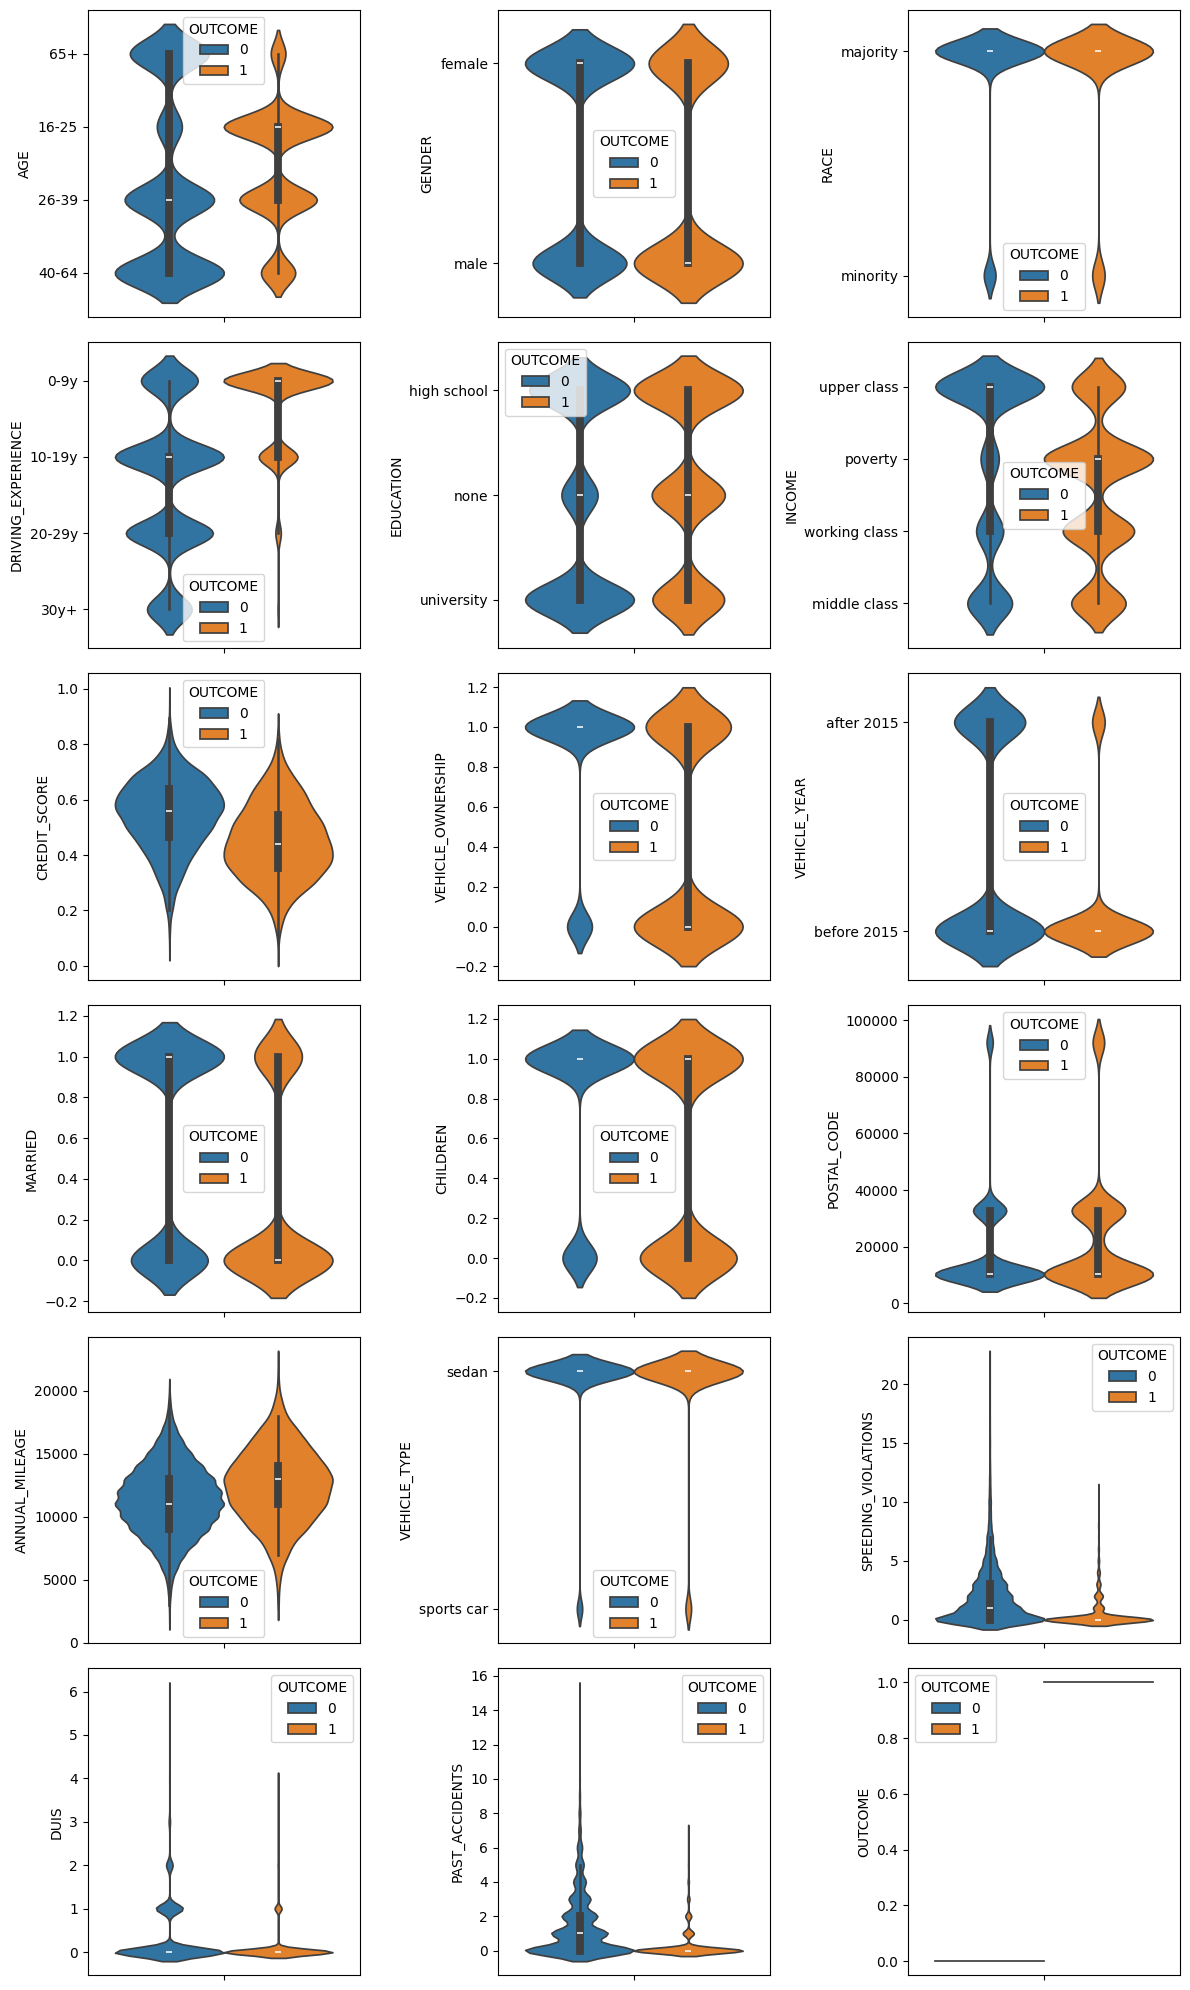

In [74]:
fig, axes = plt.subplots(6, 3, figsize=(12,20))

sns.violinplot(data=cdf, y="AGE", hue="OUTCOME", ax=axes[0,0])

sns.violinplot(data=cdf, y="GENDER", hue="OUTCOME", ax=axes[0,1])

sns.violinplot(data=cdf, y="RACE", hue="OUTCOME", ax=axes[0,2])

sns.violinplot(data=cdf, y="DRIVING_EXPERIENCE", hue="OUTCOME", ax=axes[1,0])

sns.violinplot(data=cdf, y="EDUCATION", hue="OUTCOME", ax=axes[1,1])

sns.violinplot(data=cdf, y="INCOME", hue="OUTCOME", ax=axes[1,2])

sns.violinplot(data=cdf, y="CREDIT_SCORE", hue="OUTCOME", ax=axes[2,0])

sns.violinplot(data=cdf, y="VEHICLE_OWNERSHIP", hue="OUTCOME", ax=axes[2,1])

sns.violinplot(data=cdf, y="VEHICLE_YEAR", hue="OUTCOME", ax=axes[2,2])

sns.violinplot(data=cdf, y="MARRIED", hue="OUTCOME", ax=axes[3,0])

sns.violinplot(data=cdf, y="CHILDREN", hue="OUTCOME", ax=axes[3,1])

sns.violinplot(data=cdf, y="POSTAL_CODE", hue="OUTCOME", ax=axes[3,2])

sns.violinplot(data=cdf, y="ANNUAL_MILEAGE", hue="OUTCOME", ax=axes[4,0])

sns.violinplot(data=cdf, y="VEHICLE_TYPE", hue="OUTCOME", ax=axes[4,1])

sns.violinplot(data=cdf, y="SPEEDING_VIOLATIONS", hue="OUTCOME", ax=axes[4,2])

sns.violinplot(data=cdf, y="DUIS", hue="OUTCOME", ax=axes[5,0])

sns.violinplot(data=cdf, y="PAST_ACCIDENTS", hue="OUTCOME", ax=axes[5,1])

sns.violinplot(data=cdf, y="OUTCOME", hue="OUTCOME", ax=axes[5,2])

plt.tight_layout()
plt.show()

For example we can analys **AGE, RACE and DRIVING_EXPERIENCE**.
> AGE : from violent-plot we can see when age grow the less people claim for insurance.

> DRIVING_EXPERIEMENCE : the less experience an person have, the more likely claim for insurance.

> Race : we can see race has least effecte on target.

## 5. Balance the data by the outcome category variable

Balance data with **UnderSampling**.
Why? because data not too much imbalanced.

In [75]:
cdf_grouped_by = cdf_no_outlier.groupby(['OUTCOME']) #group by dataframe on classes
print(cdf_grouped_by.size())
min_class_size = cdf_grouped_by.size().min() #get the size of the smallest class


OUTCOME
0    3230
1    2141
dtype: int64


In [76]:
# UnderSampling the bigger class to be equal to small one
cdf_balanced = cdf_grouped_by.apply(lambda x: x.sample(min_class_size).reset_index(drop=True))
cdf_balanced.head()

/tmp/ipykernel_55/858883638.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cdf_balanced = cdf_grouped_by.apply(lambda x: x.sample(min_class_size).reset_index(drop=True))


AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
OUTCOME                                                              
0       0    65+  female  majority               30y+  high school   
        1    65+  female  minority               0-9y         none   
        2  26-39  female  majority             10-19y   university   
        3    65+    male  majority             10-19y   university   
        4  26-39  female  majority             10-19y   university   

                  INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  \
OUTCOME                                                                  
0       0   middle class      0.618378                  0  before 2015   
        1   middle class      0.449536                  1  before 2015   
        2  working class      0.317883                  0  before 2015   
        3    upper class      0.524281                  1   after 2015   
        4   middle class      0.407547                  1  before 2015   

           MARRIED  CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  \
OUTCOME                                                                  
0       0        1         1        10238         11000.0        sedan   
        1        1         0        10238          8000.0        sedan   
        2        1         0        32765         13000.0        sedan   
        3        1         0        10238          9000.0        sedan   
        4        0         0        32765         13000.0        sedan   

           SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  
OUTCOME                                                        
0       0                    4     0               2        0  
        1                    0     0               0        0  
        2                    0     0               0        0  
        3                    2     0               1        0  
        4                    2     0               0        0

**Before UnderSampling**

OUTCOME
0    3230
1    2141
Name: count, dtype: int64


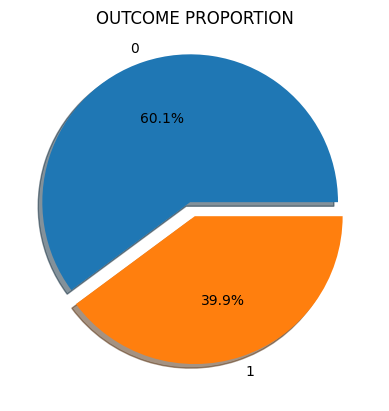

In [77]:

per_outcome = cdf_no_outlier["OUTCOME"].value_counts()

print(per_outcome)

explode = (0.1, 0)
fig, ax = plt.subplots()
per_outcome.plot(kind='pie', autopct='%1.1f%%',
                explode=explode, shadow=True)
ax.set_title('OUTCOME PROPORTION')
ax.set_ylabel('')

plt.show()

**After UnderSampling**

OUTCOME
0    2141
1    2141
Name: count, dtype: int64


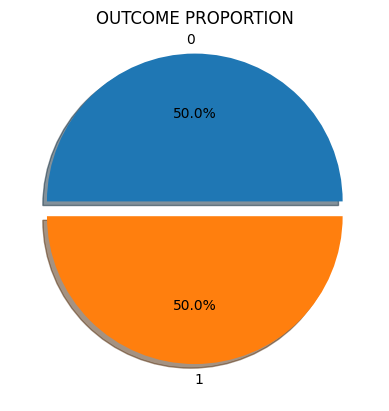

In [78]:

per_outcome = cdf_balanced["OUTCOME"].value_counts()

print(per_outcome)

explode = (0.1, 0)
fig, ax = plt.subplots()
per_outcome.plot(kind='pie', autopct='%1.1f%%',
                explode=explode, shadow=True)
ax.set_title('OUTCOME PROPORTION')
ax.set_ylabel('')

plt.show()

## 6. Numericalize non-numeric variables
Numericalize non-numeric variables using the one-shot method. &#9989;

**One Hot Encoding** is a ***method for converting categorical variables into a binary format.*** It creates new columns for each category where `1` means the category is present and `0` means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models. 

In [79]:
# import OneHotEncoder method from sklearn library

from sklearn.preprocessing import OneHotEncoder

In [80]:
cdf_balanced.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4282 entries, (np.int64(0), 0) to (np.int64(1), 2140)
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  4282 non-null   object 
 1   GENDER               4282 non-null   object 
 2   RACE                 4282 non-null   object 
 3   DRIVING_EXPERIENCE   4282 non-null   object 
 4   EDUCATION            4282 non-null   object 
 5   INCOME               4282 non-null   object 
 6   CREDIT_SCORE         4282 non-null   float64
 7   VEHICLE_OWNERSHIP    4282 non-null   int64  
 8   VEHICLE_YEAR         4282 non-null   object 
 9   MARRIED              4282 non-null   int64  
 10  CHILDREN             4282 non-null   int64  
 11  POSTAL_CODE          4282 non-null   int64  
 12  ANNUAL_MILEAGE       4282 non-null   float64
 13  VEHICLE_TYPE         4282 non-null   object 
 14  SPEEDING_VIOLATIONS  4282 non-null   int64  
 15  DUIS    

In [81]:
# Reset the index to undo the MultiIndex
cdf_balanced = cdf_balanced.reset_index(drop=True)

# Now check the info again
cdf_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  4282 non-null   object 
 1   GENDER               4282 non-null   object 
 2   RACE                 4282 non-null   object 
 3   DRIVING_EXPERIENCE   4282 non-null   object 
 4   EDUCATION            4282 non-null   object 
 5   INCOME               4282 non-null   object 
 6   CREDIT_SCORE         4282 non-null   float64
 7   VEHICLE_OWNERSHIP    4282 non-null   int64  
 8   VEHICLE_YEAR         4282 non-null   object 
 9   MARRIED              4282 non-null   int64  
 10  CHILDREN             4282 non-null   int64  
 11  POSTAL_CODE          4282 non-null   int64  
 12  ANNUAL_MILEAGE       4282 non-null   float64
 13  VEHICLE_TYPE         4282 non-null   object 
 14  SPEEDING_VIOLATIONS  4282 non-null   int64  
 15  DUIS                 4282 non-null   i

In [82]:
# List of categorical columns to encode
categorical_cols = [
    'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 
    'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE'
]

# Separate categorical and numerical columns
categorical_data = cdf_balanced[categorical_cols]
numerical_cols = [col for col in cdf_balanced.columns if col not in categorical_cols]
numerical_data = cdf_balanced[numerical_cols]


In [83]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

# Fit and transform the categorical data
encoded_array = encoder.fit_transform(categorical_data)

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)

# Combine with numerical columns
cdf_encoded = pd.concat([numerical_data, encoded_df], axis=1)

In [84]:
cdf_encoded.info()
cdf_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CREDIT_SCORE               4282 non-null   float64
 1   VEHICLE_OWNERSHIP          4282 non-null   int64  
 2   MARRIED                    4282 non-null   int64  
 3   CHILDREN                   4282 non-null   int64  
 4   POSTAL_CODE                4282 non-null   int64  
 5   ANNUAL_MILEAGE             4282 non-null   float64
 6   SPEEDING_VIOLATIONS        4282 non-null   int64  
 7   DUIS                       4282 non-null   int64  
 8   PAST_ACCIDENTS             4282 non-null   int64  
 9   OUTCOME                    4282 non-null   int64  
 10  AGE_26-39                  4282 non-null   float64
 11  AGE_40-64                  4282 non-null   float64
 12  AGE_65+                    4282 non-null   float64
 13  GENDER_male                4282 non-null   float

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.618378,0,1,1,10238,11000.0,4,0,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.449536,1,1,0,10238,8000.0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.317883,0,1,0,32765,13000.0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.524281,1,1,0,10238,9000.0,2,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.407547,1,0,0,32765,13000.0,2,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 7. Train and Test
Divide the data into two parts: training and testing.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
features = cdf_encoded.columns.drop("OUTCOME")

In [87]:
X = cdf_encoded[features]
y = cdf_encoded["OUTCOME"]

In [88]:
# Train has %70 of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [89]:
print("Train class distribution:\n", y_train.value_counts())
print()
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 OUTCOME
0    1522
1    1475
Name: count, dtype: int64

Test class distribution:
 OUTCOME
1    666
0    619
Name: count, dtype: int64


## 8. Decision tree and SVM methods
Classify using decision tree and linear SVM methods. Compare the accuracy and error table of the methods.

**Decision Tree**

A **Decision Tree** helps us to make decisions by mapping out different choices and their possible outcomes. It’s used in machine learning for tasks like classification and prediction.

![Decision Tree](https://media.geeksforgeeks.org/wp-content/uploads/20250626155553400991/how_decision_trees_work_.webp)

![hi](https://media.geeksforgeeks.org/wp-content/uploads/20250626155729954380/Decision-tree-1.webp)

In [90]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [91]:
TREE = DecisionTreeClassifier(
    random_state=42, #For constant result
    criterion='entropy', #The function to measure the quality of a split
    max_depth=5, #The maximum depth of the tree
    min_samples_split=4, #The minimum number of samples required to split an internal node
)

TREE.fit(X_train, y_train) 
TREE_Pred = TREE.predict(X_test)

**Confusion Matrix**

![hi](https://www.mygreatlearning.com/blog/wp-content/uploads/2020/03/confusion0-matrix-viosualtion-1024x661.webp)

**Precision**: the ratio between the ***True Positives*** and ***all the Positives***. It shows how many of the “yes” predictions made by the model were actually correct. It helps us reduce wrong “yes” guesses which are called ***false positives (FP)***.

----
**Recall**: tells us how well a model finds all the correct “yes” cases in the data. It checks how many real positive cases the model was able to correctly identify.

----
**Accuracy**: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

---
**F1-score**: This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric


In [92]:
print(classification_report(y_test,TREE_Pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       619
           1       0.80      0.86      0.83       666

    accuracy                           0.82      1285
   macro avg       0.82      0.81      0.81      1285
weighted avg       0.82      0.82      0.81      1285



Confusion matrix: 
 [[474 145]
 [ 92 574]]


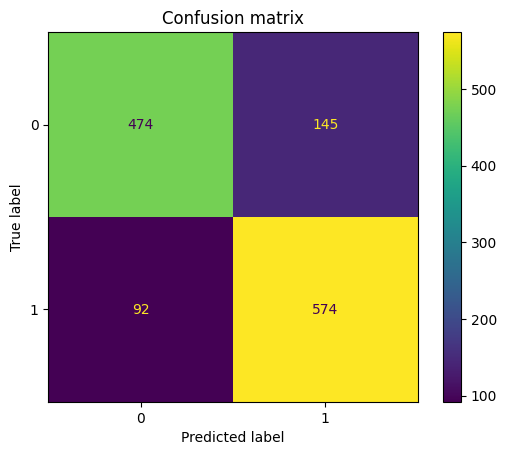

In [93]:
cm = confusion_matrix(y_test, TREE_Pred)
print("Confusion matrix: \n",cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TREE.classes_)
disp.plot()
disp.ax_.set_title('Confusion matrix')
plt.show()

**Linear SVM**

In [94]:
from sklearn import svm
## feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array


In [95]:
features

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'AGE_26-39', 'AGE_40-64', 'AGE_65+', 'GENDER_male',
       'RACE_minority', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'EDUCATION_none', 'EDUCATION_university', 'INCOME_poverty',
       'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_before 2015', 'VEHICLE_TYPE_sports car'],
      dtype='object')

In [96]:
## F-test feature selection by help of class
select = SelectKBest(score_func=f_classif, k=9)
z = select.fit_transform(X_train,y_train)

filter = select.get_support()
arr_features = array(features)
scores = -np.log10(select.pvalues_)

d = {"Features": arr_features, "Score": scores}

score_df = pd.DataFrame(d)

score_df.sort_values(by="Score", ascending=False).reset_index()

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,index,Features,Score
0,1,VEHICLE_OWNERSHIP,108.267921
1,22,VEHICLE_YEAR_before 2015,82.467071
2,8,PAST_ACCIDENTS,66.528722
3,20,INCOME_upper class,63.374388
4,0,CREDIT_SCORE,61.220649
5,19,INCOME_poverty,59.640462
6,6,SPEEDING_VIOLATIONS,59.630658
7,15,DRIVING_EXPERIENCE_20-29y,54.429194
8,14,DRIVING_EXPERIENCE_10-19y,46.712203
9,2,MARRIED,34.478589


In [97]:
print("Selected best:",arr_features[filter])

Selected best: ['CREDIT_SCORE' 'VEHICLE_OWNERSHIP' 'SPEEDING_VIOLATIONS' 'PAST_ACCIDENTS'
 'DRIVING_EXPERIENCE_10-19y' 'DRIVING_EXPERIENCE_20-29y' 'INCOME_poverty'
 'INCOME_upper class' 'VEHICLE_YEAR_before 2015']


In [98]:
good_features = arr_features[filter]

In [99]:
X_train_svm = X_train[good_features]
X_test_svm = X_test[good_features]

In [100]:
lsvm = svm.SVC(kernel='linear')
lsvm.fit(X_train_svm, y_train)

LSVM_Pred = lsvm.predict(X_test_svm)

In [101]:
print(classification_report(y_test,LSVM_Pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       619
           1       0.77      0.87      0.82       666

    accuracy                           0.80      1285
   macro avg       0.80      0.80      0.80      1285
weighted avg       0.80      0.80      0.80      1285



Confusion matrix: 
 [[446 173]
 [ 86 580]]


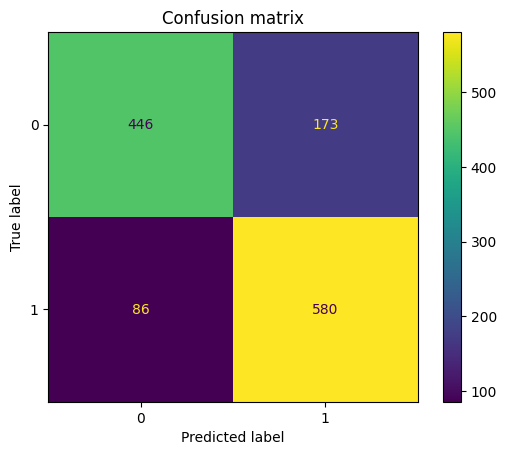

In [102]:
cm = confusion_matrix(y_test, LSVM_Pred)
print("Confusion matrix: \n",cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lsvm.classes_)
disp.plot()
disp.ax_.set_title('Confusion matrix')
plt.show()

In [103]:
print("Evaluation of TREE")
print(classification_report(y_test,TREE_Pred))
print("-------------------")
print("Evaluation of SVM-Linear")
print(classification_report(y_test,LSVM_Pred))

Evaluation of TREE
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       619
           1       0.80      0.86      0.83       666

    accuracy                           0.82      1285
   macro avg       0.82      0.81      0.81      1285
weighted avg       0.82      0.82      0.81      1285

-------------------
Evaluation of SVM-Linear
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       619
           1       0.77      0.87      0.82       666

    accuracy                           0.80      1285
   macro avg       0.80      0.80      0.80      1285
weighted avg       0.80      0.80      0.80      1285



**Decision Tree has a little bit better result**





## 9. Importance of variables in the decision tree

Calculate the importance of variables in the decision tree. Which ones are more valuable?


In [104]:
importance = TREE.feature_importances_
features_list = features.to_list()

df_importance = pd.DataFrame({'Features': features_list, 'Importance': importance})
df_importance.sort_values(by='Importance', ascending=False).reset_index()

,index,Features,Importance
0,1,VEHICLE_OWNERSHIP,0.288259
1,8,PAST_ACCIDENTS,0.193479
2,22,VEHICLE_YEAR_before 2015,0.156195
3,4,POSTAL_CODE,0.097325
4,14,DRIVING_EXPERIENCE_10-19y,0.094616
5,15,DRIVING_EXPERIENCE_20-29y,0.045610
6,12,GENDER_male,0.043825
7,6,SPEEDING_VIOLATIONS,0.040532
8,0,CREDIT_SCORE,0.015832
9,5,ANNUAL_MILEAGE,0.013989


## 10. Optimize SVM and Evaluation

Optimize the parameters of the SVM method with gridsearch and check the accuracy of the best model found.

In [50]:
## Finding best hyperparameters: Grid search, it use validtion data internally
from sklearn.model_selection import GridSearchCV


In [51]:
#1. identify parameters that we like model choose the best one
parameters = {'kernel':('linear', 'rbf'),
              'C':[0.01, 0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 'auto']
             }
#2. train and fit gridsearvh model
svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=parameters)
clf.fit(X_train_svm, y_train)

#3. return our best parameters
print("Best parameters:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test_svm)))


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.7911240957150807
Test accuracy: 0.8015564202334631


In [52]:
print(classification_report(y_test, clf.predict(X_test_svm)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       619
           1       0.78      0.86      0.82       666

    accuracy                           0.80      1285
   macro avg       0.81      0.80      0.80      1285
weighted avg       0.80      0.80      0.80      1285

